In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Visão Geral do Dataset

Objetivo: Entender a estrutura e composição básica dos dados.




In [ ]:
df = pd.read_csv('netflix_titles.csv')
df

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

### 2. Limpeza Básica e Qualidade dos Dados

Objetivo: Avaliar a qualidade dos dados e decidir sobre tratamento de valores ausentes.


In [ ]:
# convertendo datas para datatime
df['date_added'] = pd.to_datetime(df['date_added'],
                                  format=None,
                                  errors='coerce')



In [ ]:
# Convertendo para Int
df['release_year'] = df['release_year'].astype('Int64')


In [ ]:
# Tratando dados NAN, substituindo NAN para desconhecido
df['director'] = df['director'].fillna('desconecido')
df['cast'] = df['cast'].fillna('desconhecido')
df['country'] = df['country'].fillna('desconhecido')


In [ ]:
#Dropando dados NAN das colunas
df = df.dropna(subset = ['rating'])
df = df.dropna(subset = ['date_added'])
df = df.dropna(subset = ['duration'])



In [ ]:
df.head(10)

### 3. Filmes vs Séries

Objetivo: Entender a proporção de conteúdo disponível na Netflix.

In [ ]:
# numero de séries e filmes
type_counts = df['type'].value_counts()
type_counts

In [ ]:
# Porcentagem de séries e filmes no Dataset
type_counts_per = df['type'].value_counts(normalize=True)*100
type_counts_per

In [ ]:
# gráfico de barras
plt.figure(figsize=(6, 4))
ax = type_counts_per.plot(kind='bar',
                       color=['steelblue', 'orange'],
                       title='Percentual de Filmes e Séries')

ax.set_ylabel('Porcentagem (%)')

# mostrar o valor em cima de cada barra
for i, v in enumerate(type_counts_per):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()


### 4. Análise por Ano de Lançamento
Objetivo: Identificar tendências históricas de produção de conteúdo

In [ ]:
# valores de contagem por ano
release_year_counts = df['release_year'].value_counts()
release_year_counts


In [ ]:
# Separando por decadas
df['decade'] = (df['release_year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()
decade_counts


### 5. Países com Mais Títulos
Objetivo: Descobrir a distribuição geográfica do conteúdo.


In [ ]:
# DIvidindo os nomes dos paises pois estavam separados por virgulas.

# 1) split na mesma coluna (ou em uma nova, se preferir)
df['country'] = df['country'].str.split(', ')

# 2) explode em cima do próprio df
df = df.explode('country')

top_countries= df['country'].value_counts().head(10)
top_countries



In [ ]:
# porcentagem de publicação por pais.
country_pct = df['country'].value_counts(normalize=True) * 100
country_pct

In [ ]:
#gráfico de quantidade publicação por pais
colors = np.random.rand(len(top_countries), 3)  # valores RGB entre 0 e 1

plt.figure(figsize=(8, 5))
ax = top_countries.plot(kind='barh', color=colors)
ax.set_xlabel('Quantidade de títulos')
ax.set_ylabel('País')
ax.set_title('Top 10 países com mais títulos na Netflix')

plt.gca().invert_yaxis()  # deixa o país com mais títulos no topo
plt.show()

### 6. Análise de Duração: Filmes e Séries
Objetivo: Compreender características de duração/temporadas do conteúdo.

In [77]:
# Separar filmes e séries em subconjuntos
filmes = df[df["type"] == "Movie"]


In [90]:
series = df[df["type"] == "TV Show"]

In [113]:
# Para filmes: extrair número de minutos de duration

filmes["duration_min"] = (
    filmes["duration"]
    .str.replace(" min", "", regex=False)   # remove o texto " min"
    .astype("int")                          # converte para inteiro
)


/tmp/ipython-input-4225532436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes["duration_min"] = (


In [ ]:
# Para séries: extrair número de temporadas
series["seasons"] =(
	series["duration"]
	.str.replace(" Seasons", "", regex=False)
 .str.replace(" Season", "", regex=False)
	.astype("int")
)

In [103]:
# Calcular média, mediana, mínimo e máximo de duração para Series
series_media = series["seasons"].mean()
series_mediana = series["seasons"].median()
series_minimo = series["seasons"].min()
series_maximo = series["seasons"].max()

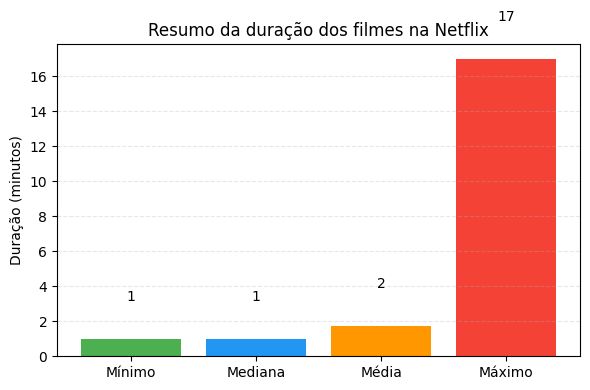

In [120]:
import matplotlib.pyplot as plt

estatisticas = {
    "Mínimo": series_minimo,
    "Mediana": series_mediana,
    "Média": series_media,
    "Máximo": series_maximo,
}

plt.figure(figsize=(6, 4))
plt.bar(estatisticas.keys(), estatisticas.values(), color=["#4caf50", "#2196f3", "#ff9800", "#f44336"])
plt.ylabel("Duração (minutos)")
plt.title("Resumo da duração dos filmes na Netflix")
plt.grid(axis="y", linestyle="--", alpha=0.3)

for i, v in enumerate(estatisticas.values()):
    plt.text(i, v + 2, f"{v:.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [117]:
# Calcular média, mediana, mínimo e máximo de duração para Filmes
filmes_media = filmes["duration_min"].mean()
filmes_mediana = filmes["duration_min"].median()
filmes_minimo = filmes["duration_min"].min()
filmes_maximo = filmes["duration_min"].max()

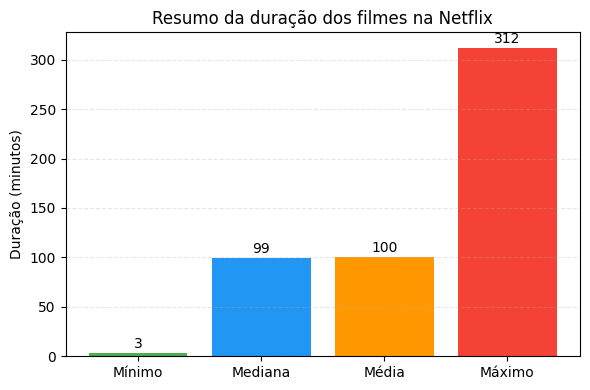

In [119]:
estatisticas = {
    "Mínimo": filmes_minimo,
    "Mediana": filmes_mediana,
    "Média": filmes_media,
    "Máximo": filmes_maximo,
}

plt.figure(figsize=(6, 4))
plt.bar(estatisticas.keys(), estatisticas.values(), color=["#4caf50", "#2196f3", "#ff9800", "#f44336"])
plt.ylabel("Duração (minutos)")
plt.title("Resumo da duração dos filmes na Netflix")
plt.grid(axis="y", linestyle="--", alpha=0.3)

for i, v in enumerate(estatisticas.values()):
    plt.text(i, v + 2, f"{v:.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [ ]:
# 1. Definimos a quantidade
n_vazias = 100

# 2. Criamos um DataFrame auxiliar com 100 colunas de nomes vazios e valores nulos
# Usamos range para garantir que o Pandas crie a estrutura correta antes de renomear
df_vazio = pd.DataFrame(index=df.index)

for i in range(n_vazias):
    df_vazio[f"temp_{i}"] = None # Adiciona valor nulo

# 3. Removemos os nomes temporários deixando apenas strings vazias
df_vazio.columns = ["" for _ in range(n_vazias)]

# 4. Concatenamos com o seu df original (netflix_titles)
df = pd.concat([df, df_vazio], axis=1)

# Verificando o resultado
print(f"Novo shape: {df.shape}")

In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
df
